a)

In [48]:
import numpy as np
import pandas as pd
name_f = "time_series_data.csv"
dataframe = pd.read_csv(name_f,sep=',',usecols=[1],engine='python',skipfooter = 3)[:2000]
dataframe[:] = dataframe[:].astype('float32')
df_train, df_test = dataframe[:1500].values, dataframe[1500:].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(df_train)
stream_train_scaled = scaler.transform(df_train)
stream_test_scaled = scaler.transform(df_test)


dataframe_val=pd.read_csv(name_f,sep=',',usecols=[1],engine='python',skipfooter = 3)[2000:]
dataframe_val[:] = dataframe_val[:].astype('float32')
df_val = dataframe_val
from sklearn.preprocessing import MinMaxScaler
scaler_val = MinMaxScaler(feature_range=(0,1)).fit(df_val)
stream_val_scaled = scaler.transform(df_val)


b)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import time

def create_dataset(stream_train_scaled, lag = 1):
    dataX = []
    dataY = []
    for i in range(len(stream_train_scaled)):
        dataX_fila = []
        dataY_fila = []
        if i == len(stream_train_scaled)-3:
            break
        for j in range(lag):
            dataX_fila.append(stream_train_scaled[i+j])
        dataY_fila.append([stream_train_scaled[i+j+1]])
        dataX.append(dataX_fila)
        dataY.append(dataY_fila)
    
    return np.array(dataX), np.array(dataY)

c) y d)

In [50]:


lag = 3
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)

trainX = trainX[:,:,0]
testX = testX[:,:,0]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
trainY = np.reshape(trainY, (-1, 1))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testY = np.reshape(testY, (-1,1))

e)

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import time


model = Sequential()
model.add(LSTM(4, input_shape=(1,lag) , activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
start = time.time()
hist = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=0)
end = time.time()
t = end - start
print("Tiempo que demora en entrenar el modelo: ", t, "seg.")

/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(1, 3), activation="tanh", recurrent_activation="sigmoid")`
  


Tiempo que demora en entrenar el modelo:  106.49994111061096 seg.


f) y g)  
Como el RMSE tiene la misma unidad de medida que la variable dependiente, se tiene que las predicciones serán erroneas en 2.41 grados en promedio. Además se observa que las predicciones fueron mejor al usar el set de datos de prueba que el de entrenamiento.

In [52]:
import math
batch_size = 1
trainPredict = model.predict(trainX,batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
trainY_f = scaler.inverse_transform(trainY)

testPredict = model.predict(testX,batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)
testY_f = scaler.inverse_transform(testY)

from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_f, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_f, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.62 RMSE
Test Score: 2.41 RMSE


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

def graficar(x,y,xmin,xmax, title):
    plt.plot(x, y)

    plt.xlabel('t')
    plt.ylabel(title)
    plt.title('Gráfico ' + title)
    plt.grid(True)
    plt.axis([xmin,xmax,1,22])
    plt.show()
    
def graficar2(x,y, title):
    plt.plot(x, y)

    plt.xlabel('t')
    plt.ylabel(title)
    plt.title('Gráfico ' + title)
    plt.grid(True)
    #plt.axis([xmin,xmax,1,22])
    plt.show()
    



h

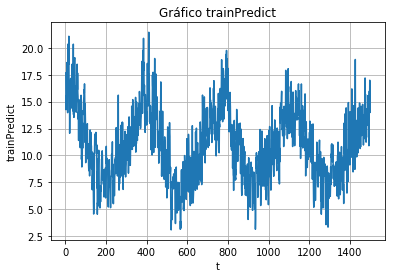

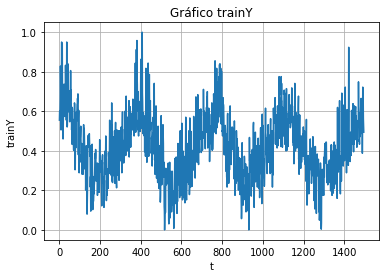

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 


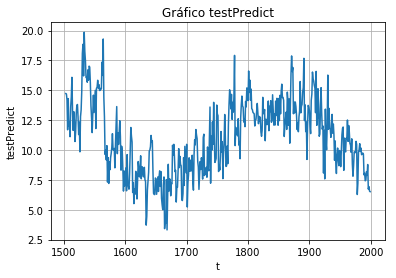

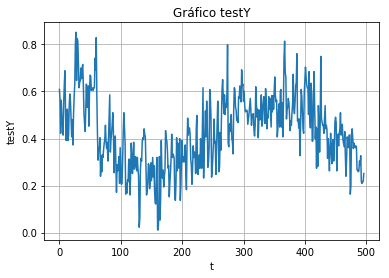

In [54]:


# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

x = np.arange(0,2000)
x2 = np.arange(0,1497)
x3 = np.arange(0,497)

graficar2(x,trainPredictPlot,'trainPredict')
graficar2(x2,trainY,'trainY')
print("--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ")
graficar2(x,testPredictPlot,'testPredict')
graficar2(x3,testY,'testY')


In [56]:
#print("Loss: ", hist.history['loss'][-1])
#print("Acc: ", hist.history['acc'][-1])

i

In [16]:
#trainX = stream_train_scaled
trainX_i = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], 1))
model = Sequential()
model.add(LSTM(4, input_shape=(3,1), activation='tanh', inner_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
start = time.time()
hist_i = model.fit(trainX_i, trainY, epochs=25, batch_size=1, verbose=0)
end = time.time()
t_i = end - start
print("Tiempo que demora en entrenar el modelo: ", t_i)

/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(3, 1), activation="tanh", recurrent_activation="sigmoid")`
  after removing the cwd from sys.path.


Tiempo que demora en entrenar el modelo:  183.92993903160095


In [25]:
print("Loss: ", hist_i.history['loss'][-1])
print("Acc: ", hist_i.history['acc'][-1])

Loss:  0.0100969859285
Acc:  0.00200400801603


In [31]:
trainX_i

array([[[ 0.7870723 ],
        [ 0.68060839],
        [ 0.71482891]],

       [[ 0.68060839],
        [ 0.71482891],
        [ 0.5551331 ]],

       [[ 0.71482891],
        [ 0.5551331 ],
        [ 0.60076052]],

       ..., 
       [[ 0.72243351],
        [ 0.59695822],
        [ 0.68441069]],

       [[ 0.59695822],
        [ 0.68441069],
        [ 0.5627377 ]],

       [[ 0.68441069],
        [ 0.5627377 ],
        [ 0.52851713]]], dtype=float32)

j

In [29]:
nb = range(4,13,2)
loss_res = []
acc_res = []
tiempos = []

lag = 3
valX,valY = create_dataset(stream_val_scaled, lag)

valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
valY = np.reshape(valY, (-1,1))


for units in nb:
    model = Sequential()
    model.add(LSTM(units,input_shape=(1,lag),activation='tanh',inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
    start = time.time()
    hist = model.fit(trainX, trainY, epochs=25, validation_data=(valX, valY)
                     , batch_size=1, verbose=0)
    loss_res.append(hist.history['loss'])
    acc_res.append(hist.history['acc'])
    end = time.time()
    t = end - start
    tiempos.append(t)
    #print("Tiempo que demora en fittear el modelo con ",units "bloques : ", t)


/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(1, 3), activation="tanh", recurrent_activation="sigmoid")`
  from ipykernel import kernelapp as app
/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(6, input_shape=(1, 3), activation="tanh", recurrent_activation="sigmoid")`
  from ipykernel import kernelapp as app
/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(1, 3), activation="tanh", recurrent_activation="sigmoid")`
  from ipykernel import kernelapp as app
/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the

Units:  4


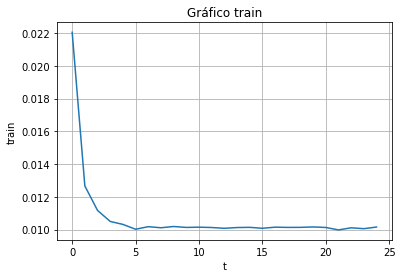

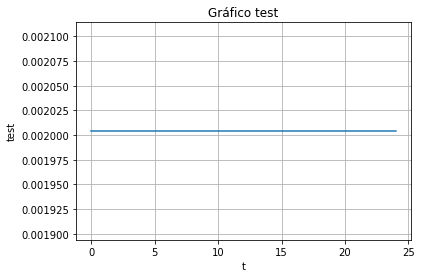

Units:  6


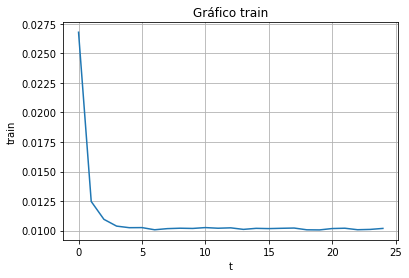

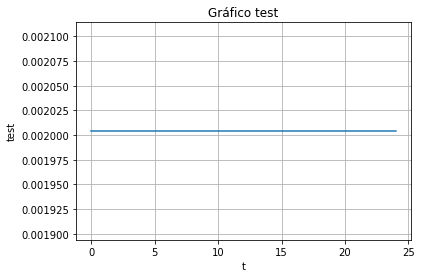

Units:  8


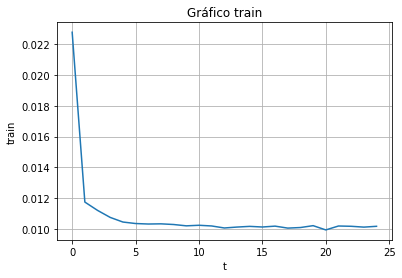

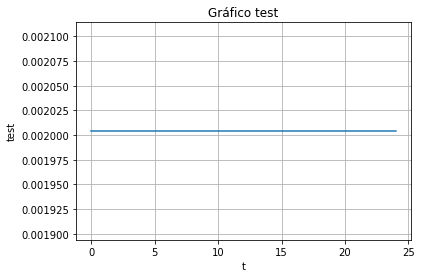

Units:  10


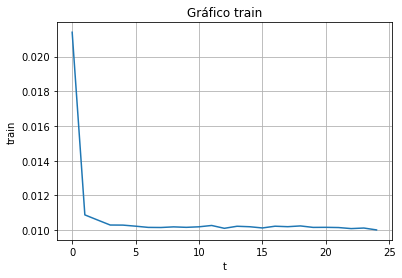

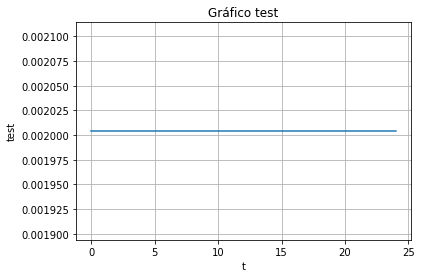

Units:  12


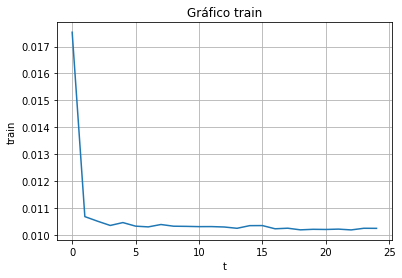

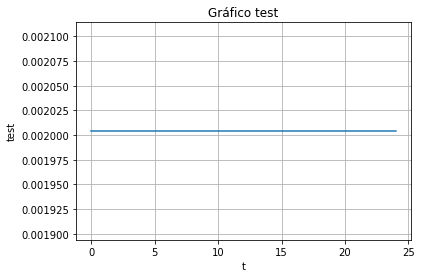

In [44]:
epochs = np.arange(25)
print("Units: ", nb[0])
graficar2(epochs,loss_res[0],'train')
graficar2(epochs,acc_res[0],'test')

print("Units: ", nb[1])
graficar2(epochs,loss_res[1],'train')
graficar2(epochs,acc_res[1],'test')

print("Units: ", nb[2])
graficar2(epochs,loss_res[2],'train')
graficar2(epochs,acc_res[2],'test')

print("Units: ", nb[3])
graficar2(epochs,loss_res[3],'train')
graficar2(epochs,acc_res[3],'test')

print("Units: ", nb[4])
graficar2(epochs,loss_res[4],'train')
graficar2(epochs,acc_res[4],'test')

k

In [55]:

lags = np.arange(1,4)

loss_res = []
acc_res = []
tiempos = []

units = 8

aux_trainX = trainX
aux_testX = testX
aux_valX = valX

for lag in lags:
        
    #crear conjuntos con el lag determinado
    aux_trainX, aux_trainY = create_dataset(stream_val_scaled, lag)
    aux_testX, aux_testY = create_dataset(stream_val_scaled, lag)
    aux_valX, aux_valY = create_dataset(stream_val_scaled, lag)
    
    #reshapes
    
    aux_trainX = np.reshape(aux_trainX, (aux_trainX.shape[0], 1, aux_trainX.shape[1]))
    aux_trainY = np.reshape(aux_trainY, (-1, 1))
    aux_testX = np.reshape(aux_testX, (aux_testX.shape[0], 1, aux_testX.shape[1]))
    aux_testY = np.reshape(aux_testY, (-1,1))
    aux_valX = np.reshape(aux_valX, (aux_valX.shape[0], 1, aux_valX.shape[1]))
    aux_valY = np.reshape(aux_valY, (-1,1))
    

    model = Sequential()
    model.add(LSTM(units,input_shape=(1,lag),activation='tanh',inner_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
    start = time.time()
    hist = model.fit(aux_trainX, aux_trainY, epochs=25, validation_data=(aux_valX, aux_valY)
                     , batch_size=1, verbose=0)
    loss_res.append(hist.history['loss'])
    acc_res.append(hist.history['acc'])
    end = time.time()
    t = end - start
    tiempos.append(t)

/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(1, 1), activation="tanh", recurrent_activation="sigmoid")`
/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(1, 2), activation="tanh", recurrent_activation="sigmoid")`
/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(1, 3), activation="tanh", recurrent_activation="sigmoid")`


Lag:  1


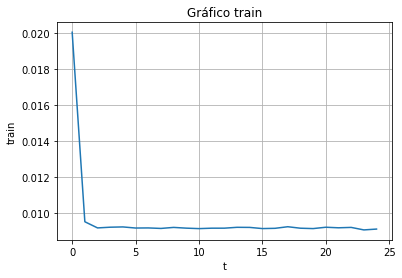

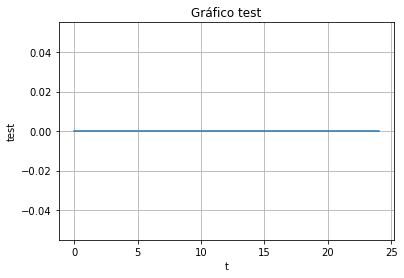

Lag:  2


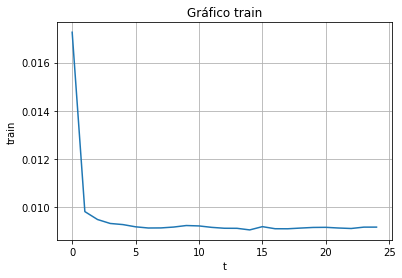

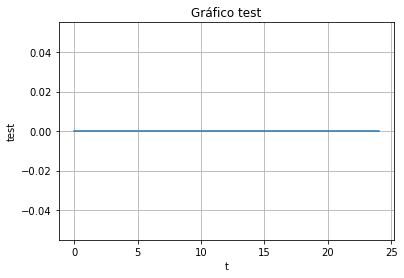

Lag:  3


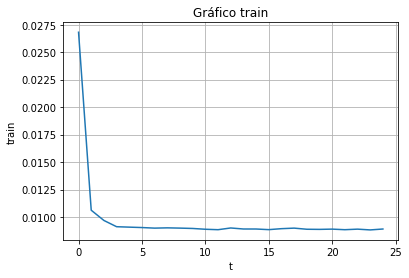

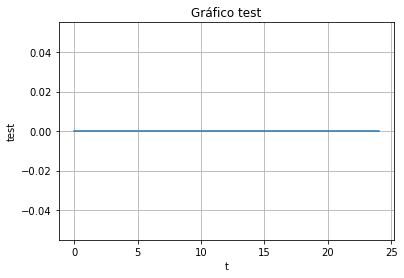

In [57]:
epochs = np.arange(25)
print("Lag: ", lags[0])
graficar2(epochs,loss_res[0],'train')
graficar2(epochs,acc_res[0],'test')

print("Lag: ", lags[1])
graficar2(epochs,loss_res[1],'train')
graficar2(epochs,acc_res[1],'test')

print("Lag: ", lags[2])
graficar2(epochs,loss_res[2],'train')
graficar2(epochs,acc_res[2],'test')




l)  
Se observa, a partir de los gráficos, que la red GRU converge mas uniformemente que la red recurrente simple, la cual converge rápidamente a un error constante cercano a 0.01. En cuanto a los tiempos de entrenamiento, la red GRU presenta un mayor tiempo que la red recurrente simple.

/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(4, input_shape=(1, 3), activation="tanh", recurrent_initializer="orthogonal")`
  if __name__ == '__main__':
/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(4, input_shape=(1, 3), activation="tanh", recurrent_initializer="orthogonal")`


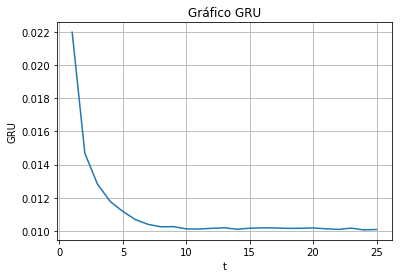

Tiempo que demora en entrenar GRU:  138.68336081504822


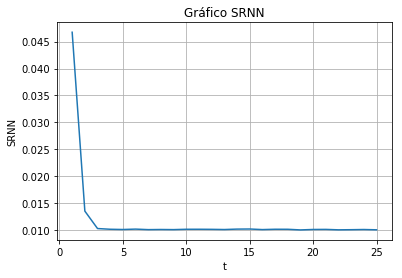

Tiempo que demora en entrenar SRNN:  81.35934400558472


In [33]:
from keras.layers import GRU
from keras.layers import SimpleRNN


#GRU
lag = 3

model = Sequential()
model.add(GRU(4, input_shape=(1,lag), inner_init='orthogonal', activation='tanh'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
start = time.time()
hist_gru = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=0)
end = time.time()
t_gru = end - start

#SRNN

model = Sequential()
model.add(SimpleRNN(4, input_shape=(1,lag), inner_init='orthogonal', activation='tanh'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
start = time.time()
hist_srnn = model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=0)
end = time.time()
t_srnn = end - start

graficar2(np.arange(1,26),hist_gru.history['loss'],'GRU')
print("Tiempo que demora en entrenar GRU: ", t_gru)

graficar2(np.arange(1,26),hist_srnn.history['loss'],'SRNN')
print("Tiempo que demora en entrenar SRNN: ", t_srnn)


m

In [57]:
aux_trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], 1))

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(25):
    model.fit(aux_trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

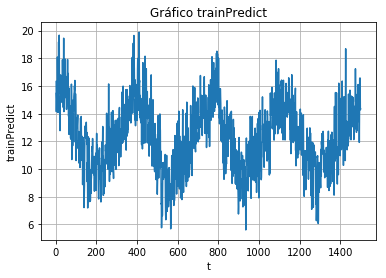

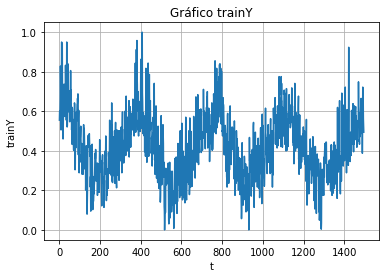

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 


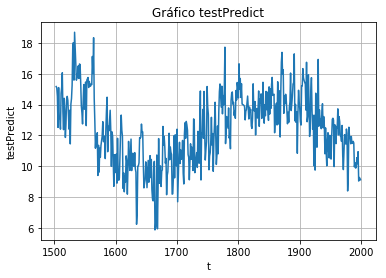

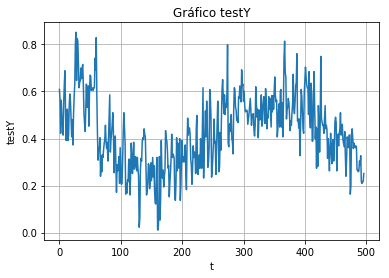

In [59]:
import math

aux_testX = np.reshape(testX, (testX.shape[0], testX.shape[2], 1))

batch_size = 1
trainPredict = model.predict(aux_trainX,batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform(trainY)

testPredict = model.predict(aux_testX,batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform(testY)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredict

#x = np.arange(0,2000)

#graficar2(x,trainPredictPlot,'train')
#graficar2(x,testPredictPlot,'test')

x = np.arange(0,2000)
x2 = np.arange(0,1497)
x3 = np.arange(0,497)

graficar2(x,trainPredictPlot,'trainPredict')
graficar2(x2,trainY,'trainY')
print("--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ")
graficar2(x,testPredictPlot,'testPredict')
graficar2(x3,testY,'testY')

n

In [60]:
batch_size = 3
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(25):
    model.fit(aux_trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()
    
    

trainPredict = model.predict(aux_trainX,batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform(trainY)

testPredict = model.predict(aux_testX[0:495],batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform(testY)



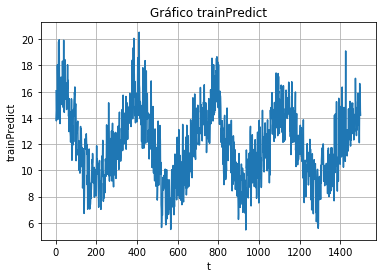

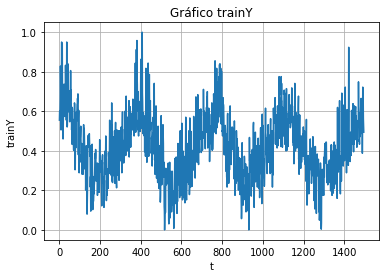

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 


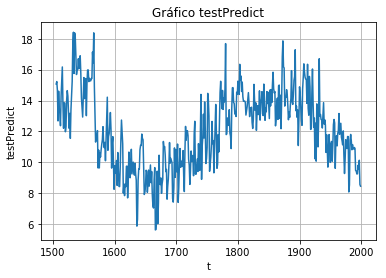

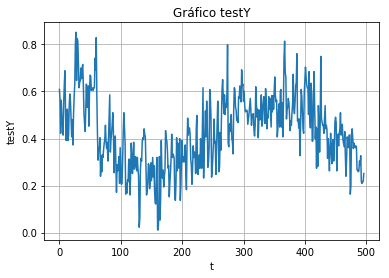

In [61]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag+2):, :] = testPredict

#x = np.arange(0,2000)
#x2 = np.arange(0,495)

#graficar2(x,trainPredictPlot,'train')
#graficar2(x,testPredictPlot,'test')

x = np.arange(0,2000)
x2 = np.arange(0,1497)
x3 = np.arange(0,497)

graficar2(x,trainPredictPlot,'trainPredict')
graficar2(x2,trainY,'trainY')
print("--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ")
graficar2(x,testPredictPlot,'testPredict')
graficar2(x3,testY,'testY')

o

In [63]:



#GRU
lag = 3
batch_size = 1

trainX_o = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], 1))

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, lag, 1), stateful=True))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
start = time.time()
hist = model.fit(trainX_o, trainY, epochs=25, batch_size=batch_size, verbose=0)
end = time.time()
t = end - start


trainPredict = model.predict(trainX_o, batch_size=batch_size)

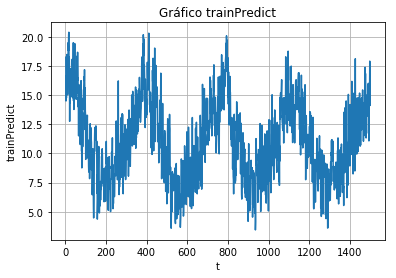

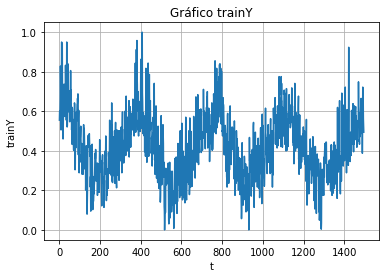

--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- 


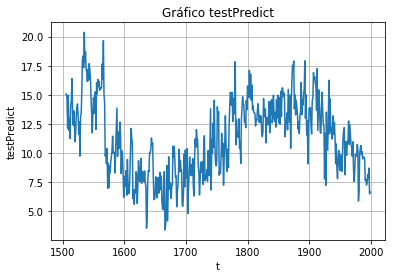

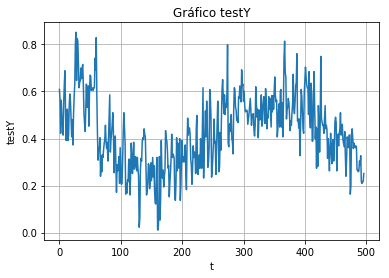

In [64]:
trainPredict = scaler.inverse_transform(trainPredict)

testX_o = np.reshape(testX, (testX.shape[0], testX.shape[2], 1))

testPredict = model.predict(testX_o[0:495],batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)


# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag+2):, :] = testPredict


#print("Tiempo que demora en fittear el modelo: ", t)
#x = np.arange(0,2000)

#graficar2(x,trainPredictPlot,'train')
#graficar2(x,testPredictPlot,'test')

x = np.arange(0,2000)
x2 = np.arange(0,1497)
x3 = np.arange(0,497)

graficar2(x,trainPredictPlot,'trainPredict')
graficar2(x2,trainY,'trainY')
print("--- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ")
graficar2(x,testPredictPlot,'testPredict')
graficar2(x3,testY,'testY')

In [42]:
dataframe_prueba = pd.read_csv(name_f,sep=',',usecols=[1],engine='python',skipfooter = 3)